In [148]:
import pandas as pd
import numpy as np
google_price = pd.read_csv('./google_price.csv')
google_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [149]:
google_price.shape

(1260, 7)

In [150]:
google_price.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace = True)

google_price.head()

,Date,High
0,2016-03-28,738.989990
1,2016-03-29,747.250000
2,2016-03-30,757.880005
3,2016-03-31,750.849976
4,2016-04-01,750.340027


In [151]:
google_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1260 non-null   object 
 1   High    1260 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [152]:
google_price['Date'] = pd.to_datetime(google_price['Date'], format='%Y-%m-%d')

google_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1260 non-null   datetime64[ns]
 1   High    1260 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [153]:
import datetime
last_month = -1

df = pd.DataFrame(columns=['Date', 'High'])
for row in google_price.itertuples():
    if (last_month != row.Date.month):
        last_month = row.Date.month
        df = df.append({'Date': datetime.date(row.Date.year, row.Date.month, 1),
                        'High': row.High}, ignore_index=True)
        
google_price = df
google_price.head(10)

,Date,High
0,2016-03-01,738.989990
1,2016-04-01,750.340027
2,2016-05-01,700.640015
3,2016-06-01,737.210022
4,2016-07-01,700.650024
5,2016-08-01,780.429993
6,2016-09-01,771.020020
7,2016-10-01,776.065002
8,2016-11-01,789.489990
9,2016-12-01,759.849976


In [154]:
google_price = google_price.set_index(['Date'])

google_price.head()

,High
Date,
2016-03-01,738.989990
2016-04-01,750.340027
2016-05-01,700.640015
2016-06-01,737.210022
2016-07-01,700.650024


<AxesSubplot:title={'center':'Original'}, xlabel='Date', ylabel='High'>

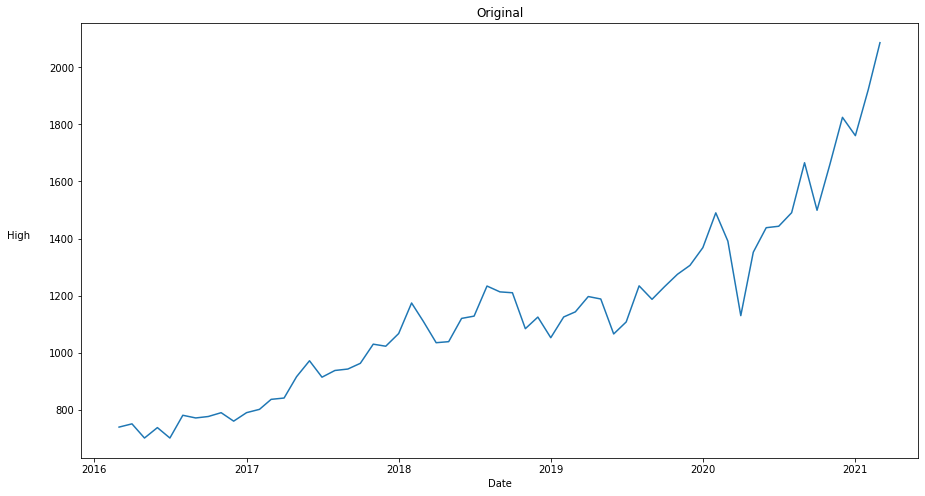

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title('Original')
plt.ylabel('High', rotation=0, labelpad=30)
google_price['High'].plot()

<AxesSubplot:title={'center':'Residual'}, xlabel='Date'>

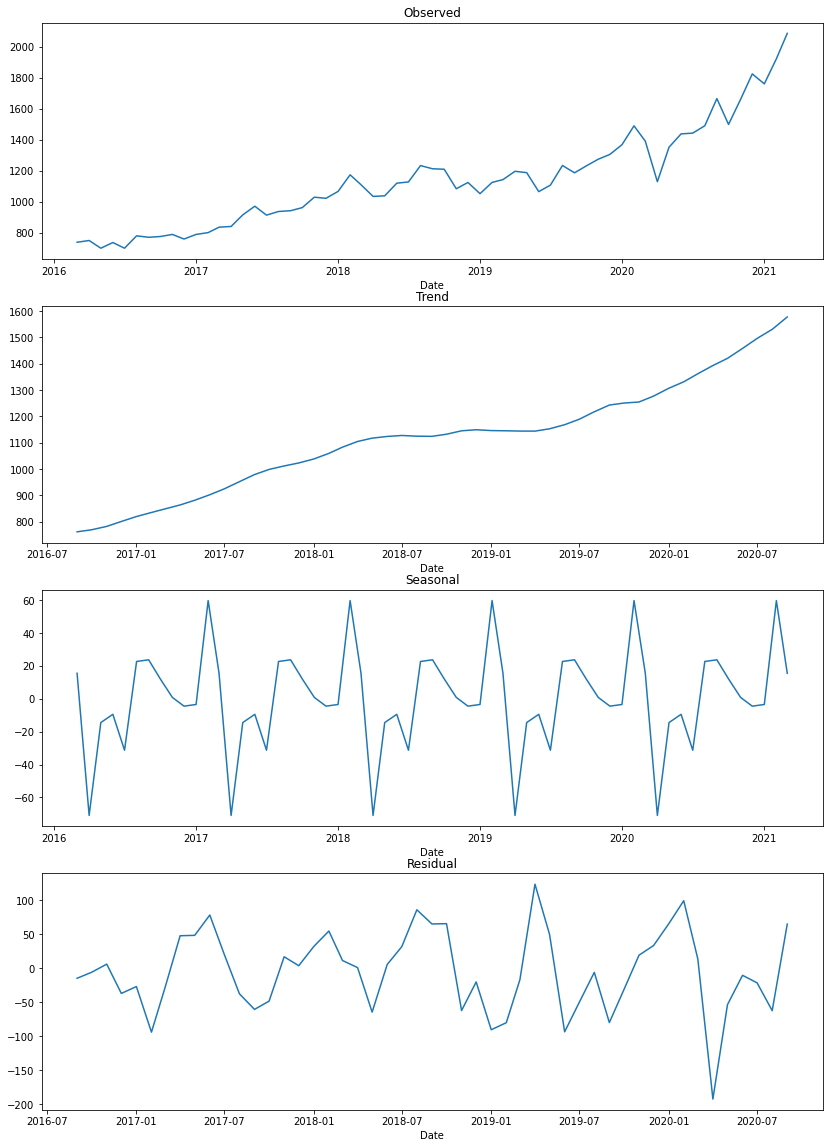

In [156]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#plt.figure(figsize=(15, 40))
decomposition = seasonal_decompose(google_price['High'], period=12)
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

ax[0].set_title('Observed')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decomposition.observed.plot(ax=ax[0])
decomposition.trend.plot(ax=ax[1])
decomposition.seasonal.plot(ax=ax[2])
decomposition.resid.plot(ax=ax[3])

In [157]:
google_price['High_Diff1'] = google_price['High'] - google_price['High'].shift(1)
google_price.head()

,High,High_Diff1
Date,,
2016-03-01,738.989990,NaN
2016-04-01,750.340027,11.350037
2016-05-01,700.640015,-49.700012
2016-06-01,737.210022,36.570007
2016-07-01,700.650024,-36.559998


<AxesSubplot:title={'center':'Diff'}, xlabel='Date', ylabel='High_Diff1'>

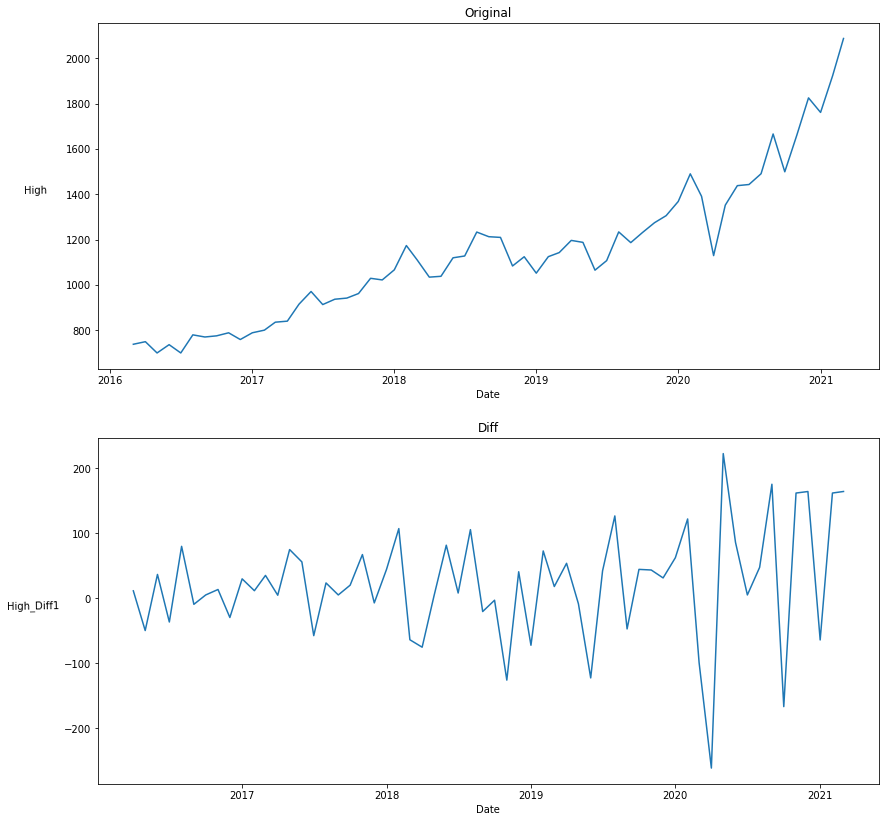

In [158]:
plt.subplots(nrows = 2, ncols = 1, figsize = (14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('High', rotation = 1, labelpad = 30)
google_price['High'].plot(ax = ax)

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('High_Diff1', rotation = 1, labelpad = 30)
google_price['High_Diff1'].plot(ax = ax)

In [159]:
regression_df = google_price.copy()
regression_df = regression_df.drop(['High_Diff1'], axis = 1)
regression_df.head()

,High
Date,
2016-03-01,738.989990
2016-04-01,750.340027
2016-05-01,700.640015
2016-06-01,737.210022
2016-07-01,700.650024


In [160]:
X = regression_df.to_numpy()[:-1, :]
X.shape

(60, 1)

In [161]:
Y = np.squeeze(regression_df.to_numpy()[1:])
Y.shape

(60,)

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, shuffle = False)

In [163]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
linear_regression.coef_

array([0.62208745])

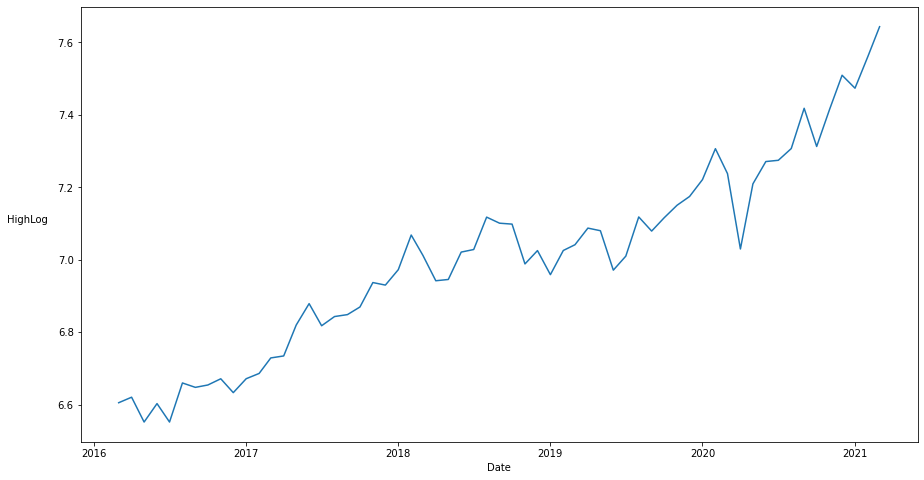

In [164]:
google_price['HighLog'] = np.log(google_price['High'])

plt.figure(figsize=(15, 8))
plt.ylabel('HighLog', rotation=0, labelpad=30)
google_price['HighLog'].plot();

In [165]:
d = 1
D = 1

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)

In [166]:
from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [111]:
import statsmodels.api as sm
from tqdm import tqdm

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            google_price['HighLog'], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], 12)
        ).fit(disp = -1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

  0%|                                                                                           | 0/64 [00:00<?, ?it/s]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: 

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 12%|██████████▍                                                                        | 8/64 [00:41<05:46,  6.19s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 23%|███████████████████▏                                                              | 15/64 [01:20<04:58,  6.09s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 34%|████████████████████████████▏                                                     | 22/64 [02:04<04:06,  5.88s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 45%|█████████████████████████████████████▏                                            | 29/64 [02:55<03:54,  6.71s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 56%|██████████████████████████████████████████████▏                                   | 36/64 [03:47<03:40,  7.88s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 64%|████████████████████████████████████████████████████▌                             | 41/64 [04:20<02:38,  6.91s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|█████████████████████████████████████████████████████████████▌                    | 48/64 [05:20<02:27,  9.19s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 84%|█████████████████████████████████████████████████████████████████████▏            | 54/64 [06:03<01:13,  7.35s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non

C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|████████████████████████████████████████████████████████████████████████████▉     | 60/64 [07:01<00:39,  9.86s/it]C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tema\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non

In [167]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
0   (1, 1, 3, 1) -100.440477
2   (1, 1, 4, 1)  -98.457738
16  (2, 1, 3, 1)  -98.447630
4   (1, 2, 3, 1)  -98.444645
1   (1, 1, 3, 2)  -98.442736


In [168]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            HighLog   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(3, 1, 1, 12)   Log Likelihood                  57.220
Date:                            Wed, 24 Nov 2021   AIC                           -100.440
Time:                                    14:58:12   BIC                            -87.342
Sample:                                03-01-2016   HQIC                           -95.491
                                     - 03-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1642      0.650      0.253      0.801      -1.110       1.439
ma.L1         -0.4942      0.626   

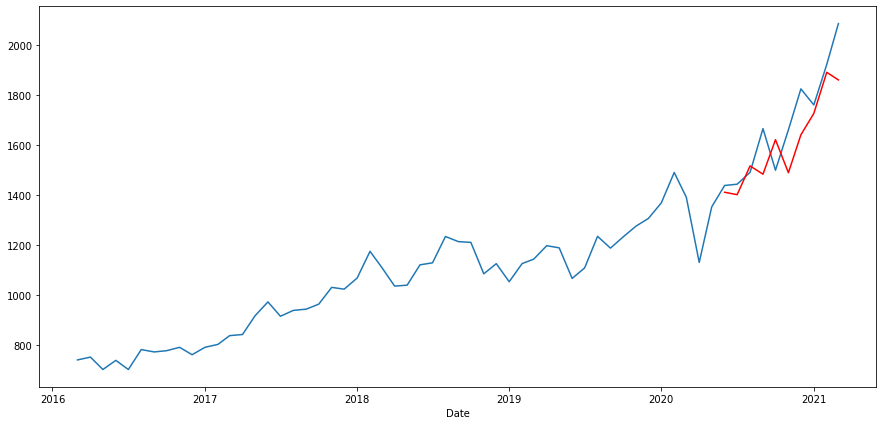

In [172]:
google_price['Model'] = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

google_price['High'].plot()
google_price['Model'][51:].plot(c='r');

In [173]:
def mape():
    actual = google_price['High']
    predicted = google_price['Model']
    sum = 0
    for i in range(51, len(google_price['High'])):
        sum += abs(actual[i] - predicted[i])/actual[i]
    mp = sum * 100 / len(google_price['High'])
    return mp

In [174]:
print(mape())

0.9910181999964597
